# Importing Libraries

In [2]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product
from scipy.stats import skewnorm

from datetime import datetime
from sklearn.impute import KNNImputer
from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

# Reading the Data

In [3]:
df_flights = pd.read_csv('/Users/miguelcaramelo/Desktop/Data_Science/1_semestre/Data_Mining/Projeto/Data-Mining/DM_AIAI_FlightsDB.csv', sep = ',')

# Metadata

**Variables**
- `Loyalty`: Unique customer identifier linking to CustomerDB;
- `Year`: Year of flight activity record;
- `Month`: Month of flight activity record (1-12);
- `YearMonthDate`: First day of the month for the activity period;
- `NumFlights`: Total number of flights taken by customer in the month;
- `NumFlightsWithCompanions`: Number of flights where customer traveled with companions;
- `DistanceKM`: Total distance traveled in kilometers for the month;
- `PointsAccumulated`: Loyalty points earned by customer during the month;
- `PointsRedeemed`: Loyalty points spent/redeemed by customer during the month;
- `DollarCostPointsRedeemed`: Dollar value of points redeemed during the month;

In [4]:
df_flights.head()

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12     12/1/2021         2.0                       2.0   
1    464105  2021     12     12/1/2021         0.0                       0.0   
2    681785  2021     12     12/1/2021        10.0                       3.0   
3    185013  2021     12     12/1/2021        16.0                       4.0   
4    216596  2021     12     12/1/2021         9.0                       0.0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0              938.0             0.0                       0.0  
1         0.0                0.0             0.0                       0.0  
2     14745.0             1474.0             0.0                       0.0  
3     26311.0             2631.0          3213.0                      32.0  
4     19275.0             1927.0             0.0                       0.0

In [5]:
df_flights.tail()

Loyalty#  Year  Month YearMonthDate  NumFlights  \
608431    999902  2019     12     12/1/2019         7.2   
608432    999911  2019     12     12/1/2019         0.0   
608433    999940  2019     12     12/1/2019        14.4   
608434    999982  2019     12     12/1/2019         0.0   
608435    999986  2019     12     12/1/2019         0.0   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
608431                       0.0     30766.5            3076.65   
608432                       0.0         0.0               0.00   
608433                       0.9     18261.0            1826.10   
608434                       0.0         0.0               0.00   
608435                       0.0         0.0               0.00   

        PointsRedeemed  DollarCostPointsRedeemed  
608431             0.0                       0.0  
608432             0.0                       0.0  
608433             0.0                       0.0  
608434             0.0                       0.0  
608435             0.0                       0.0

# Initial Analysis

In [6]:
# Checking shape of dataframe
df_flights.shape

(608436, 10)

In [7]:
# Checking the info of the dataframe
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [8]:
df_flights.describe().T

count           mean            std       min  \
Loyalty#                  608436.0  550037.873084  258935.180575  100018.0   
Year                      608436.0    2020.000000       0.816497    2019.0   
Month                     608436.0       6.500000       3.452055       1.0   
NumFlights                608436.0       3.908107       5.057889       0.0   
NumFlightsWithCompanions  608436.0       0.983944       2.003785       0.0   
DistanceKM                608436.0    7939.341419   10260.421873       0.0   
PointsAccumulated         608436.0     793.777781    1025.918521       0.0   
PointsRedeemed            608436.0     235.251678     983.233374       0.0   
DollarCostPointsRedeemed  608436.0       2.324835       9.725168       0.0   

                                25%         50%          75%       max  
Loyalty#                  326961.00  550834.000  772194.0000  999986.0  
Year                        2019.00    2020.000    2021.0000    2021.0  
Month                          3.75       6.500       9.2500      12.0  
NumFlights                     0.00       0.000       7.2000      21.0  
NumFlightsWithCompanions       0.00       0.000       0.9000      11.0  
DistanceKM                     0.00     856.400   15338.1750   42040.0  
PointsAccumulated              0.00      85.275    1533.7125    4204.0  
PointsRedeemed                 0.00       0.000       0.0000    7496.0  
DollarCostPointsRedeemed       0.00       0.000       0.0000      74.0

In [9]:
df_flights.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

In [12]:
df_flights.duplicated().sum()
print(df_flights[df_flights.duplicated()])
df_flights[df_flights["Loyalty#"] == 263267]

        Loyalty#  Year  Month YearMonthDate  NumFlights  \
3150      263267  2020      6      6/1/2020         0.0   
3442      584833  2020      6      6/1/2020         0.0   
5193      351615  2020      5      5/1/2020         0.0   
5371      979115  2020      5      5/1/2020         0.0   
5397      951353  2020      5      5/1/2020         0.0   
...          ...   ...    ...           ...         ...   
607515    950980  2019     12     12/1/2019         0.0   
607519    951353  2019     12     12/1/2019         0.0   
607696    960050  2019     12     12/1/2019         0.0   
608111    981508  2019     12     12/1/2019         0.0   
608264    990512  2019     12     12/1/2019         0.0   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
3150                         0.0         0.0                0.0   
3442                         0.0         0.0                0.0   
5193                         0.0         0.0                0.0   
5371                   

Loyalty#  Year  Month YearMonthDate  NumFlights  \
1092      263267  2020      6      6/1/2020         0.0   
3150      263267  2020      6      6/1/2020         0.0   
14057     263267  2020      5      5/1/2020         0.0   
25441     263267  2020      5      5/1/2020         0.0   
37425     263267  2020      4      4/1/2020         0.0   
...          ...   ...    ...           ...         ...   
560775    263267  2019     10     10/1/2019         0.0   
577675    263267  2019     11     11/1/2019         0.0   
577676    263267  2019     11     11/1/2019         0.0   
594576    263267  2019     12     12/1/2019         0.0   
594577    263267  2019     12     12/1/2019         0.0   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
1092                         0.0         0.0                0.0   
3150                         0.0         0.0                0.0   
14057                        0.0         0.0                0.0   
25441                        0.0         0.0                0.0   
37425                        0.0         0.0                0.0   
...                          ...         ...                ...   
560775                       0.0         0.0                0.0   
577675                       0.0         0.0                0.0   
577676                       0.0         0.0                0.0   
594576                       0.0         0.0                0.0   
594577                       0.0         0.0                0.0   

        PointsRedeemed  DollarCostPointsRedeemed  
1092               0.0                       0.0  
3150               0.0                       0.0  
14057              0.0                       0.0  
25441              0.0                       0.0  
37425              0.0                       0.0  
...                ...                       ...  
560775             0.0                       0.0  
577675             0.0                       0.0  
577676             0.0                       0.0  
594576             0.0                       0.0  
594577             0.0                       0.0  

[72 rows x 10 columns]

In [11]:
# replace "" by nans
df_flights.replace("", np.nan, inplace=True)

# count of missing values
df_flights.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

In [10]:
# Passar a coluna "YearMonthDate" para o formato datetime
df_flights["YearMonthDate"] = pd.to_datetime(df_flights["YearMonthDate"])

In [11]:
df_flights.describe(include='all').T

count                 mean                  min  \
Loyalty#                  608436.0        550037.873084             100018.0   
Year                      608436.0               2020.0               2019.0   
Month                     608436.0                  6.5                  1.0   
YearMonthDate               608436  2020-06-16 02:40:00  2019-01-01 00:00:00   
NumFlights                608436.0             3.908107                  0.0   
NumFlightsWithCompanions  608436.0             0.983944                  0.0   
DistanceKM                608436.0          7939.341419                  0.0   
PointsAccumulated         608436.0           793.777781                  0.0   
PointsRedeemed            608436.0           235.251678                  0.0   
DollarCostPointsRedeemed  608436.0             2.324835                  0.0   

                                          25%                  50%  \
Loyalty#                             326961.0             550834.0   
Year                                   2019.0               2020.0   
Month                                    3.75                  6.5   
YearMonthDate             2019-09-23 12:00:00  2020-06-16 00:00:00   
NumFlights                                0.0                  0.0   
NumFlightsWithCompanions                  0.0                  0.0   
DistanceKM                                0.0                856.4   
PointsAccumulated                         0.0               85.275   
PointsRedeemed                            0.0                  0.0   
DollarCostPointsRedeemed                  0.0                  0.0   

                                          75%                  max  \
Loyalty#                             772194.0             999986.0   
Year                                   2021.0               2021.0   
Month                                    9.25                 12.0   
YearMonthDate             2021-03-08 18:00:00  2021-12-01 00:00:00   
NumFlights                                7.2                 21.0   
NumFlightsWithCompanions                  0.9                 11.0   
DistanceKM                          15338.175              42040.0   
PointsAccumulated                   1533.7125               4204.0   
PointsRedeemed                            0.0               7496.0   
DollarCostPointsRedeemed                  0.0                 74.0   

                                    std  
Loyalty#                  258935.180575  
Year                           0.816497  
Month                          3.452055  
YearMonthDate                       NaN  
NumFlights                     5.057889  
NumFlightsWithCompanions       2.003785  
DistanceKM                 10260.421873  
PointsAccumulated           1025.918521  
PointsRedeemed               983.233374  
DollarCostPointsRedeemed       9.725168

# Numeric Variables' Univariate Distribution

In [12]:
# Creating a list with the names of the metric features
metric_features = ['NumFlights', 'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']

## Histograms

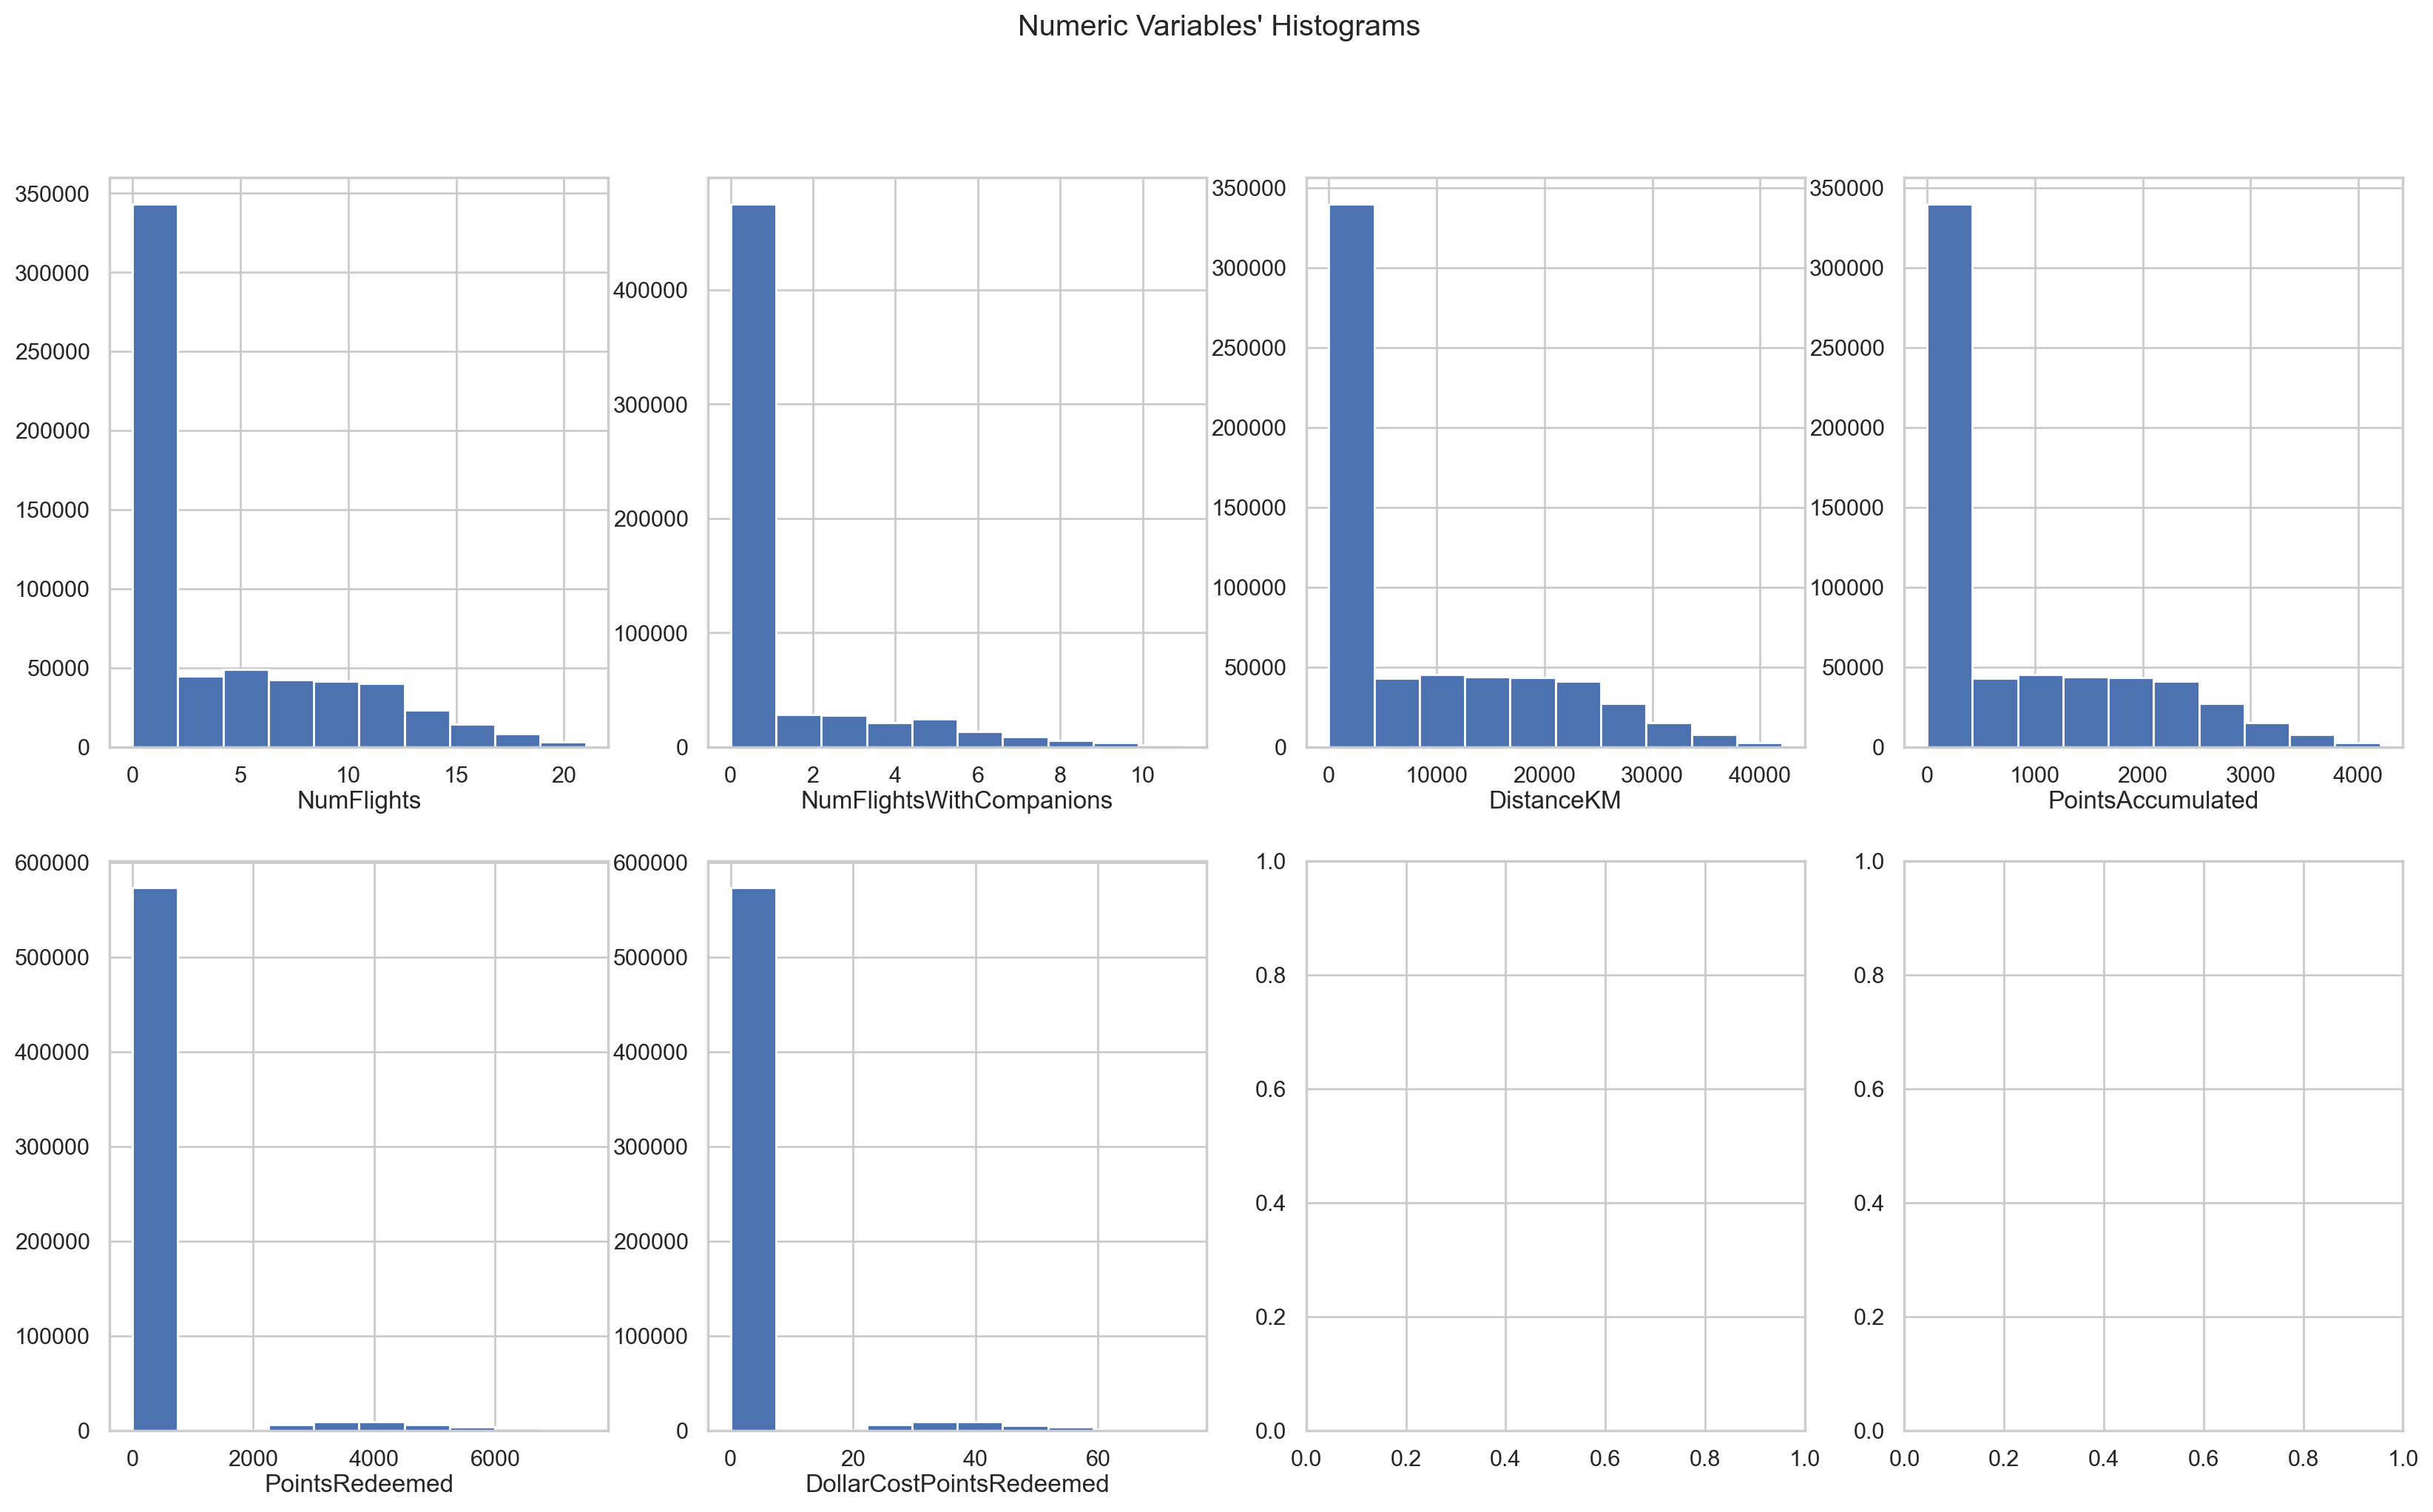

In [ ]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")

sp_rows = 2
sp_cols = 4


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df_flights[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)



plt.show()

## BoxPlots

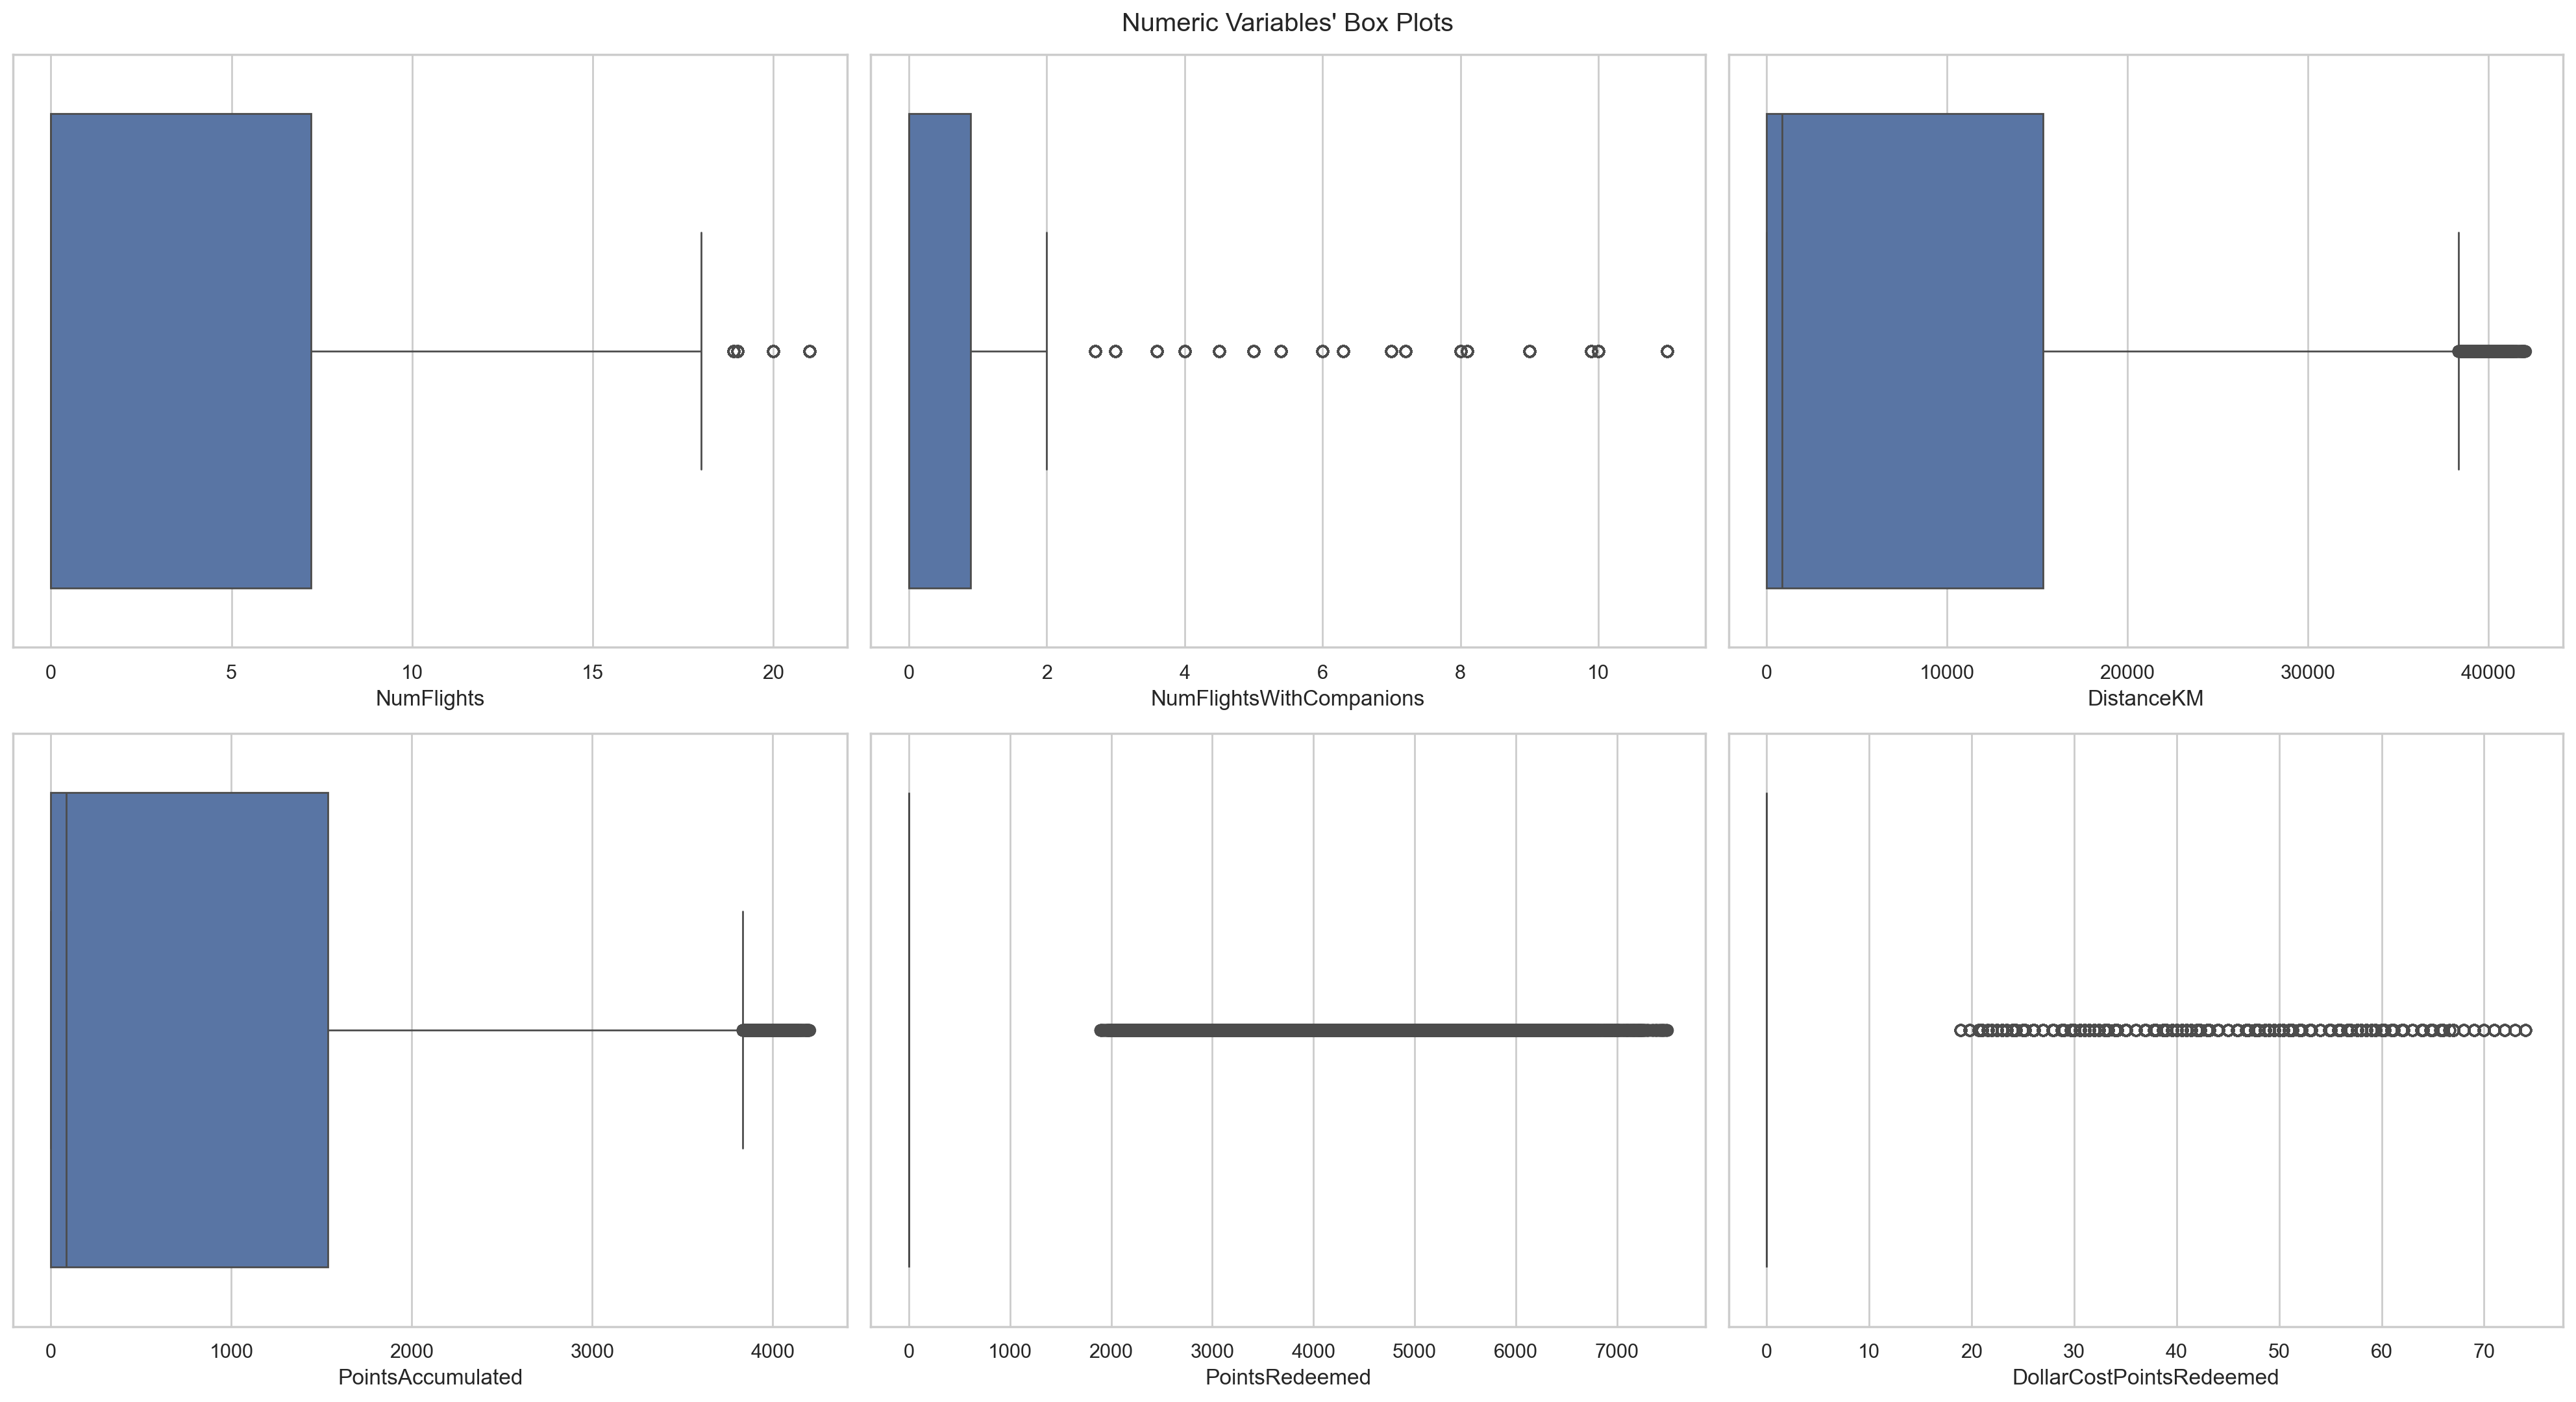

In [ ]:
# Plot ALL Numeric Variables' BoxPlots in one figure

sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")


## What do these do?
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram  
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_flights[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
"""
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)
"""

plt.show()

Text(0.5, 0.98, 'Pairwise Relationship of Numerical Variables')

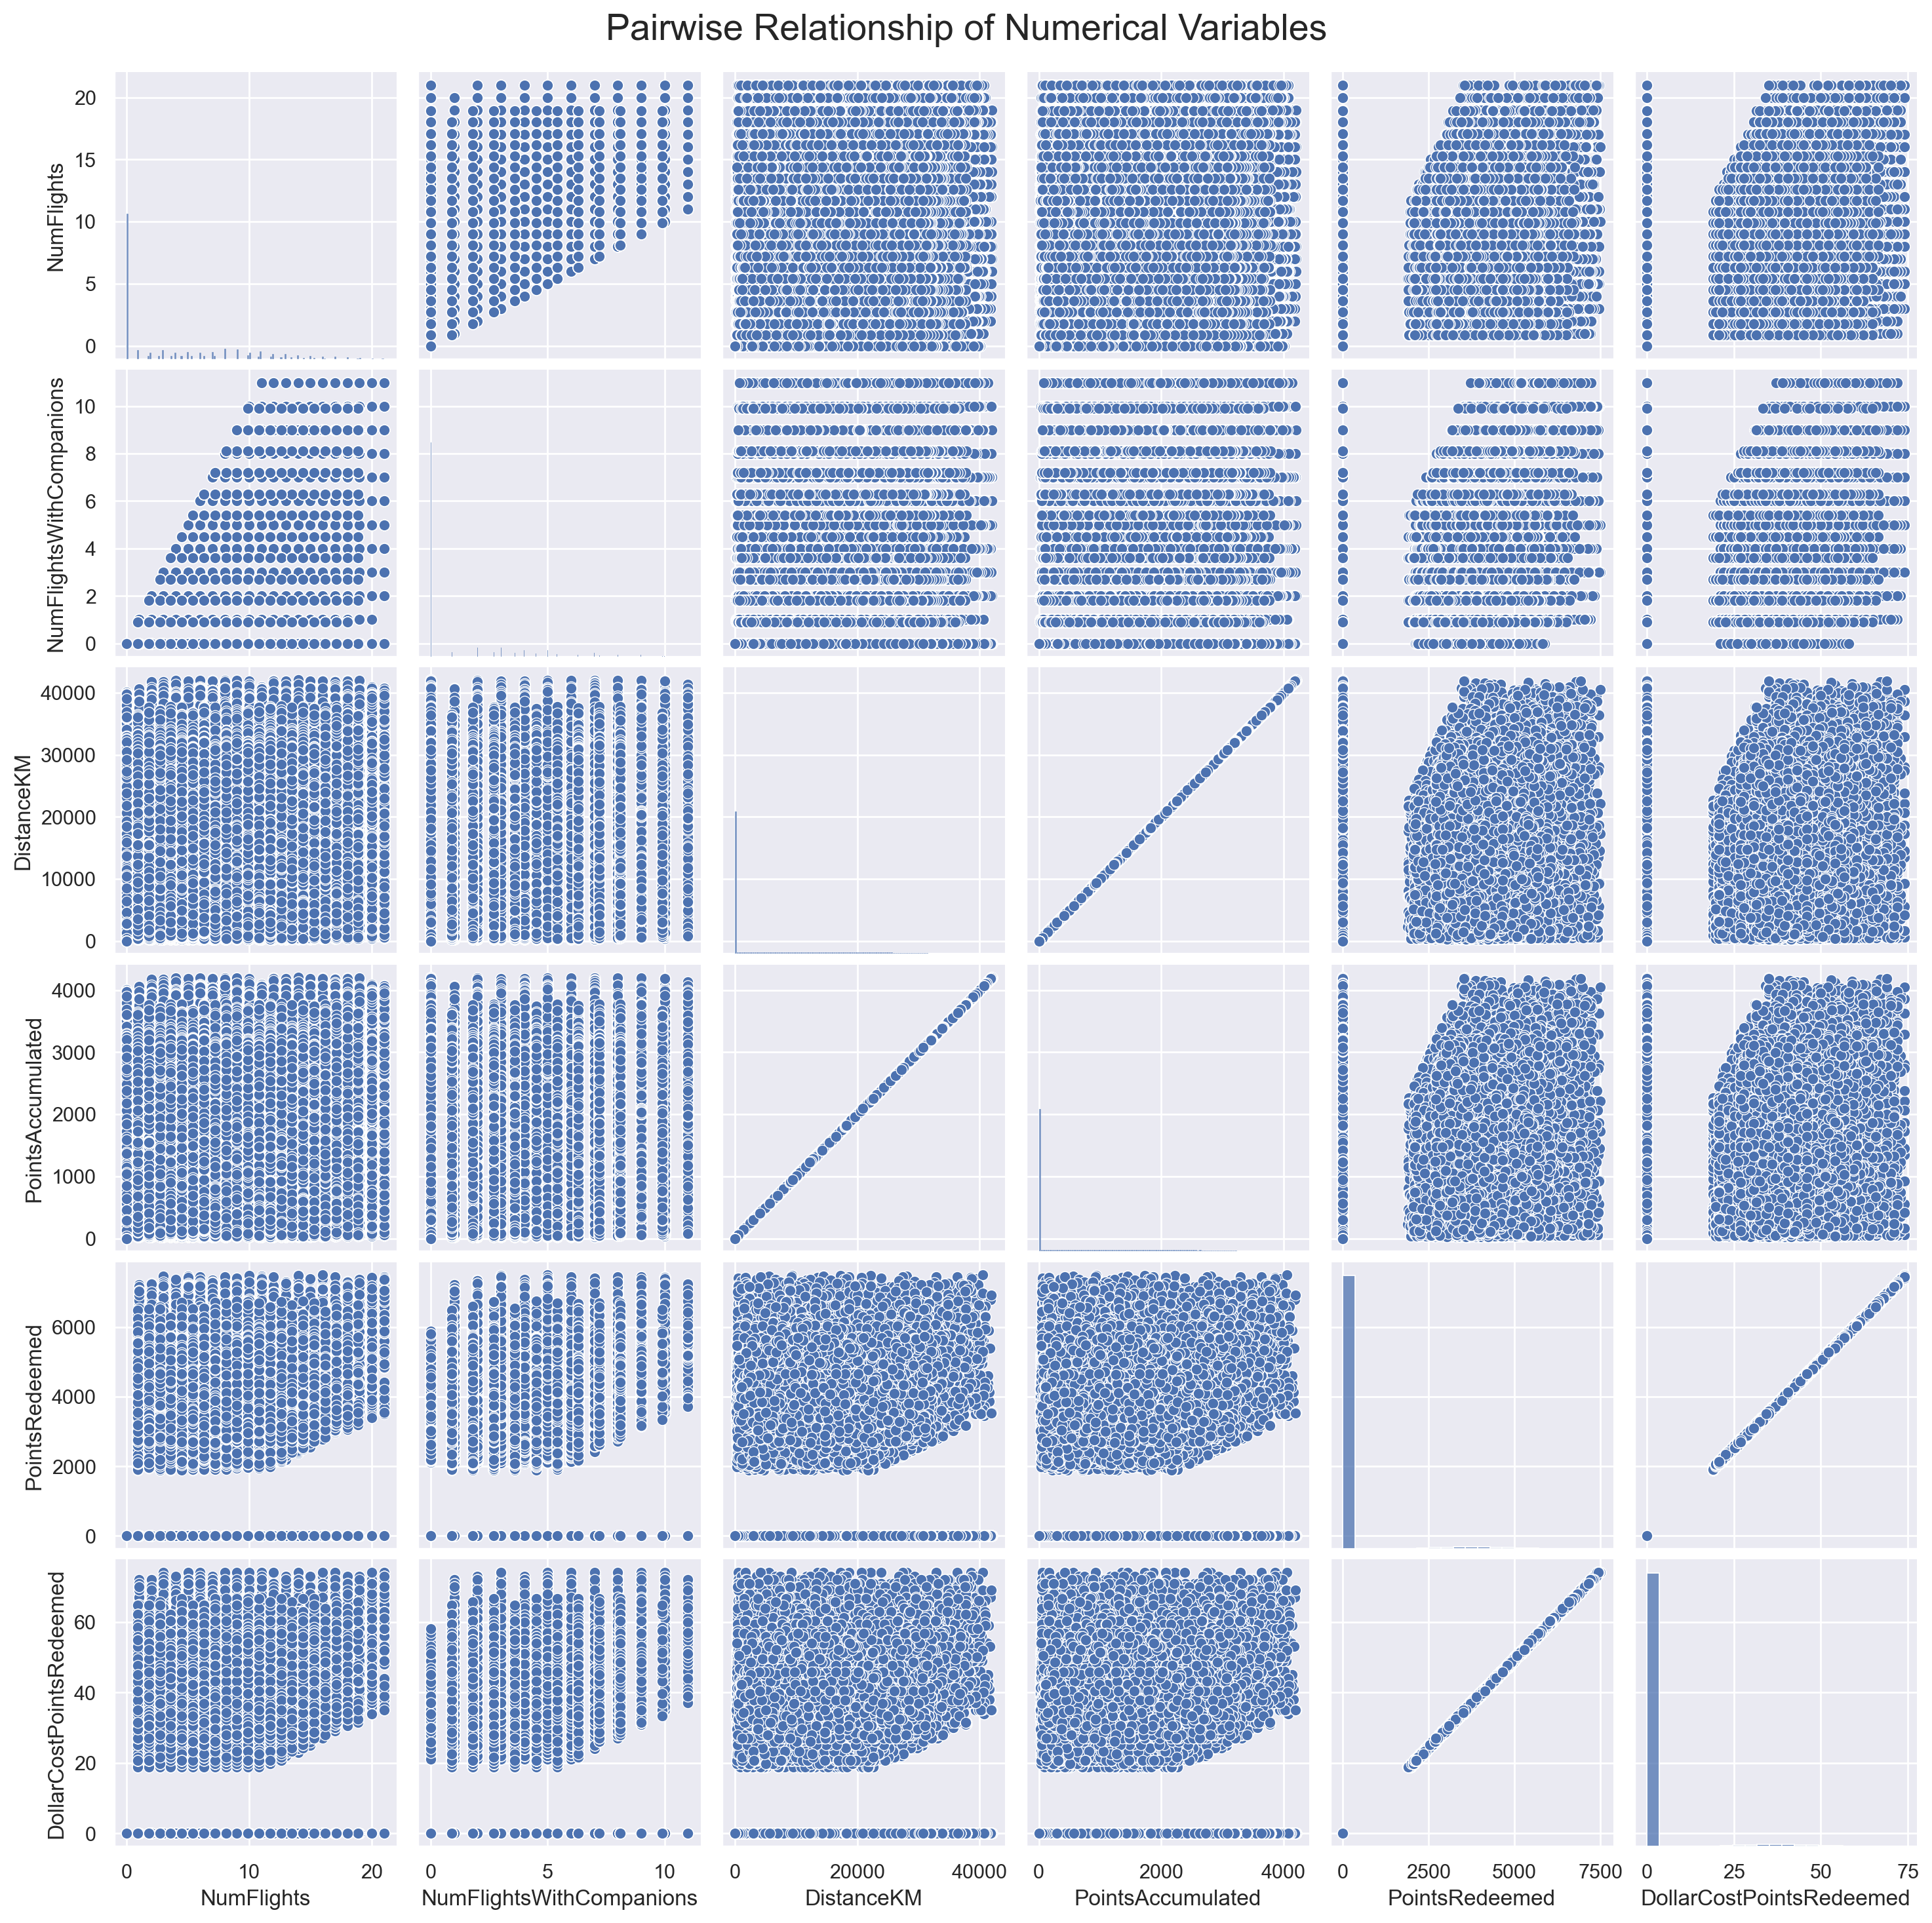

In [15]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df_flights[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

In [16]:
df_flights_filtered = df_flights[df_flights['NumFlights'] > 0]
df_flights_filtered

Loyalty#  Year  Month YearMonthDate  NumFlights  \
0         413052  2021     12    2021-12-01         2.0   
2         681785  2021     12    2021-12-01        10.0   
3         185013  2021     12    2021-12-01        16.0   
4         216596  2021     12    2021-12-01         9.0   
5         486956  2021     12    2021-12-01        12.0   
...          ...   ...    ...           ...         ...   
608423    999524  2019     12    2019-12-01        13.5   
608424    999550  2019     12    2019-12-01         8.1   
608426    999631  2019     12    2019-12-01         3.6   
608431    999902  2019     12    2019-12-01         7.2   
608433    999940  2019     12    2019-12-01        14.4   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
0                            2.0      9384.0             938.00   
2                            3.0     14745.0            1474.00   
3                            4.0     26311.0            2631.00   
4                            0.0     19275.0            1927.00   
5                            7.0     23967.0            2396.00   
...                          ...         ...                ...   
608423                       4.5     22572.9            2257.29   
608424                       0.0     18168.3            1816.83   
608426                       1.8     12262.5            1226.25   
608431                       0.0     30766.5            3076.65   
608433                       0.9     18261.0            1826.10   

        PointsRedeemed  DollarCostPointsRedeemed  
0                  0.0                       0.0  
2                  0.0                       0.0  
3               3213.0                      32.0  
4                  0.0                       0.0  
5                  0.0                       0.0  
...                ...                       ...  
608423             0.0                       0.0  
608424             0.0                       0.0  
608426             0.0                       0.0  
608431             0.0                       0.0  
608433             0.0                       0.0  

[303912 rows x 10 columns]

In [17]:
df_flights_filtered.describe(include='all').T

count                           mean  \
Loyalty#                  303912.0                  549006.106968   
Year                      303912.0                    2020.049593   
Month                     303912.0                        6.64496   
YearMonthDate               303912  2020-07-08 15:28:36.275763968   
NumFlights                303912.0                       7.824084   
NumFlightsWithCompanions  303912.0                        1.96987   
DistanceKM                303912.0                   15588.317563   
PointsAccumulated         303912.0                    1558.524642   
PointsRedeemed            303912.0                     470.977092   
DollarCostPointsRedeemed  303912.0                       4.654352   

                                          min                  25%  \
Loyalty#                             100018.0             326699.0   
Year                                   2019.0               2019.0   
Month                                     1.0                  4.0   
YearMonthDate             2019-01-01 00:00:00  2019-10-01 00:00:00   
NumFlights                                0.9                  4.0   
NumFlightsWithCompanions                  0.0                  0.0   
DistanceKM                              238.5               7796.7   
PointsAccumulated                       23.85               779.04   
PointsRedeemed                            0.0                  0.0   
DollarCostPointsRedeemed                  0.0                  0.0   

                                          50%                  75%  \
Loyalty#                             549551.5             771667.0   
Year                                   2020.0               2021.0   
Month                                     7.0                 10.0   
YearMonthDate             2020-08-01 00:00:00  2021-04-01 00:00:00   
NumFlights                                7.2                 11.0   
NumFlightsWithCompanions                  0.9                  3.6   
DistanceKM                            15058.0              22565.0   
PointsAccumulated                     1505.52               2256.0   
PointsRedeemed                            0.0                  0.0   
DollarCostPointsRedeemed                  0.0                  0.0   

                                          max            std  
Loyalty#                             999986.0  258296.280653  
Year                                   2021.0        0.82507  
Month                                    12.0       3.449283  
YearMonthDate             2021-12-01 00:00:00            NaN  
NumFlights                               21.0       4.536193  
NumFlightsWithCompanions                 11.0        2.46906  
DistanceKM                            42040.0    9354.323646  
PointsAccumulated                      4204.0     935.417209  
PointsRedeemed                         7496.0     1350.71243  
DollarCostPointsRedeemed                 74.0      13.360619

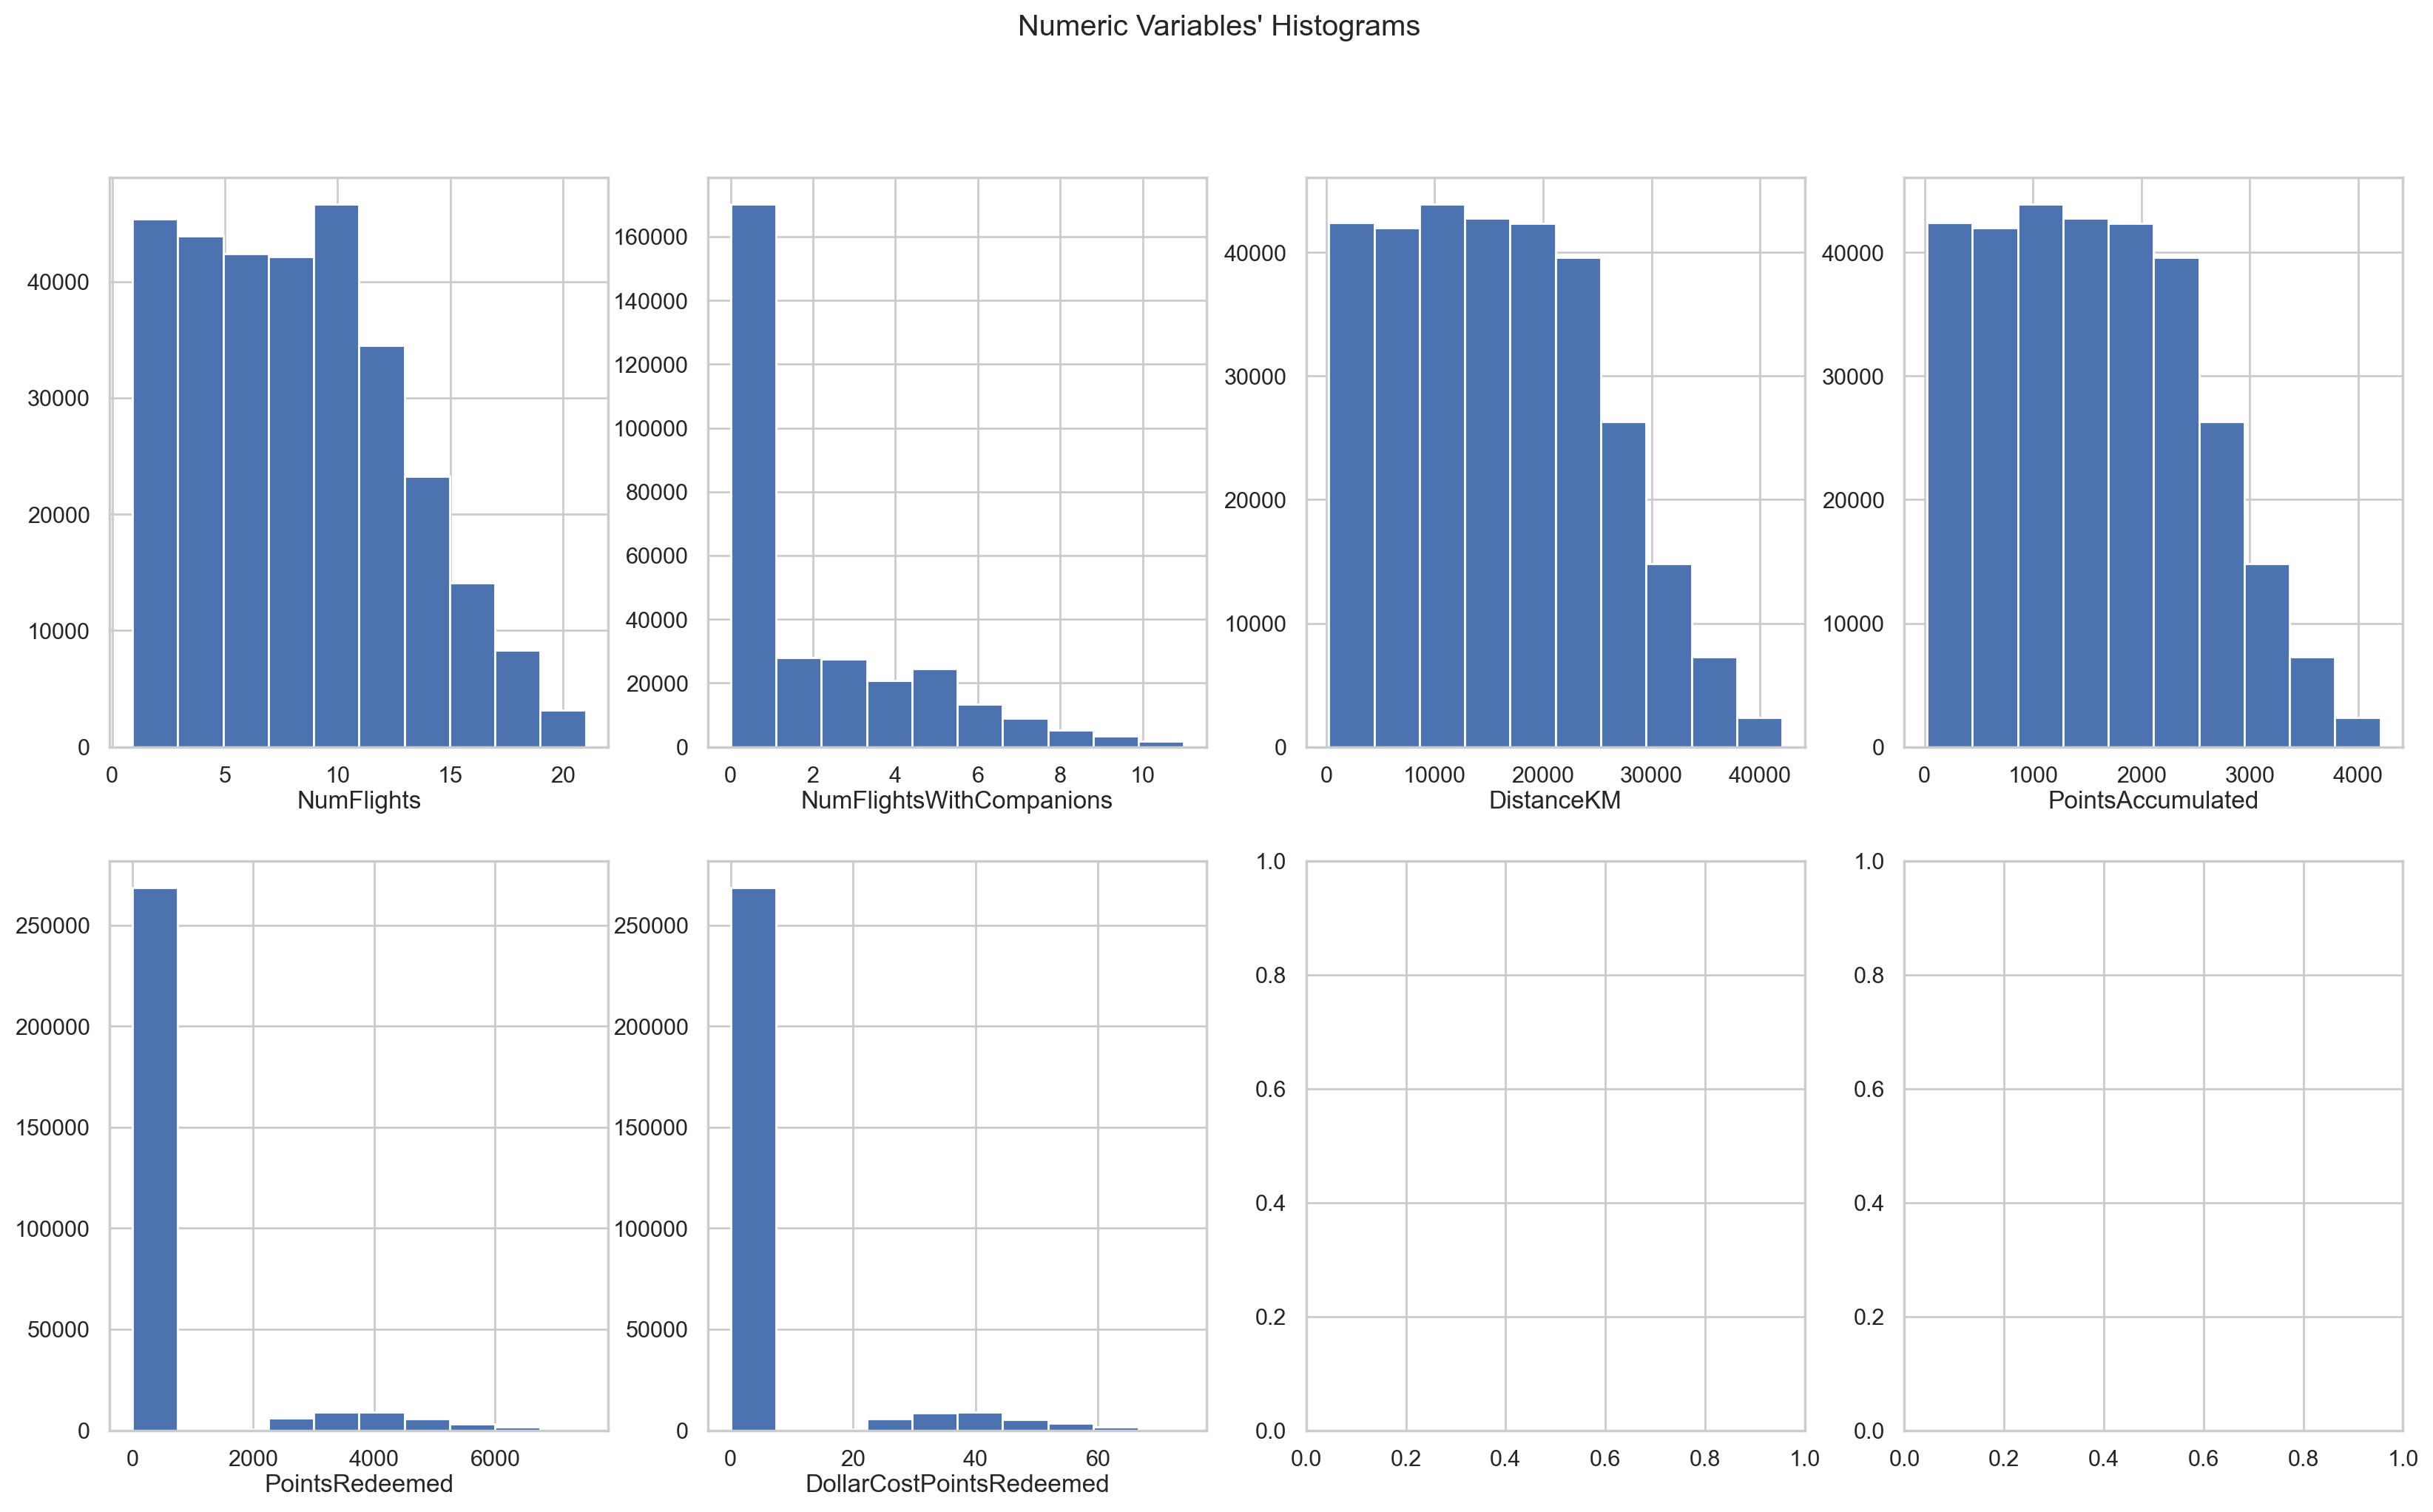

In [18]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")

sp_rows = 2
sp_cols = 4


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df_flights_filtered[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)
"""
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)
"""
plt.show()

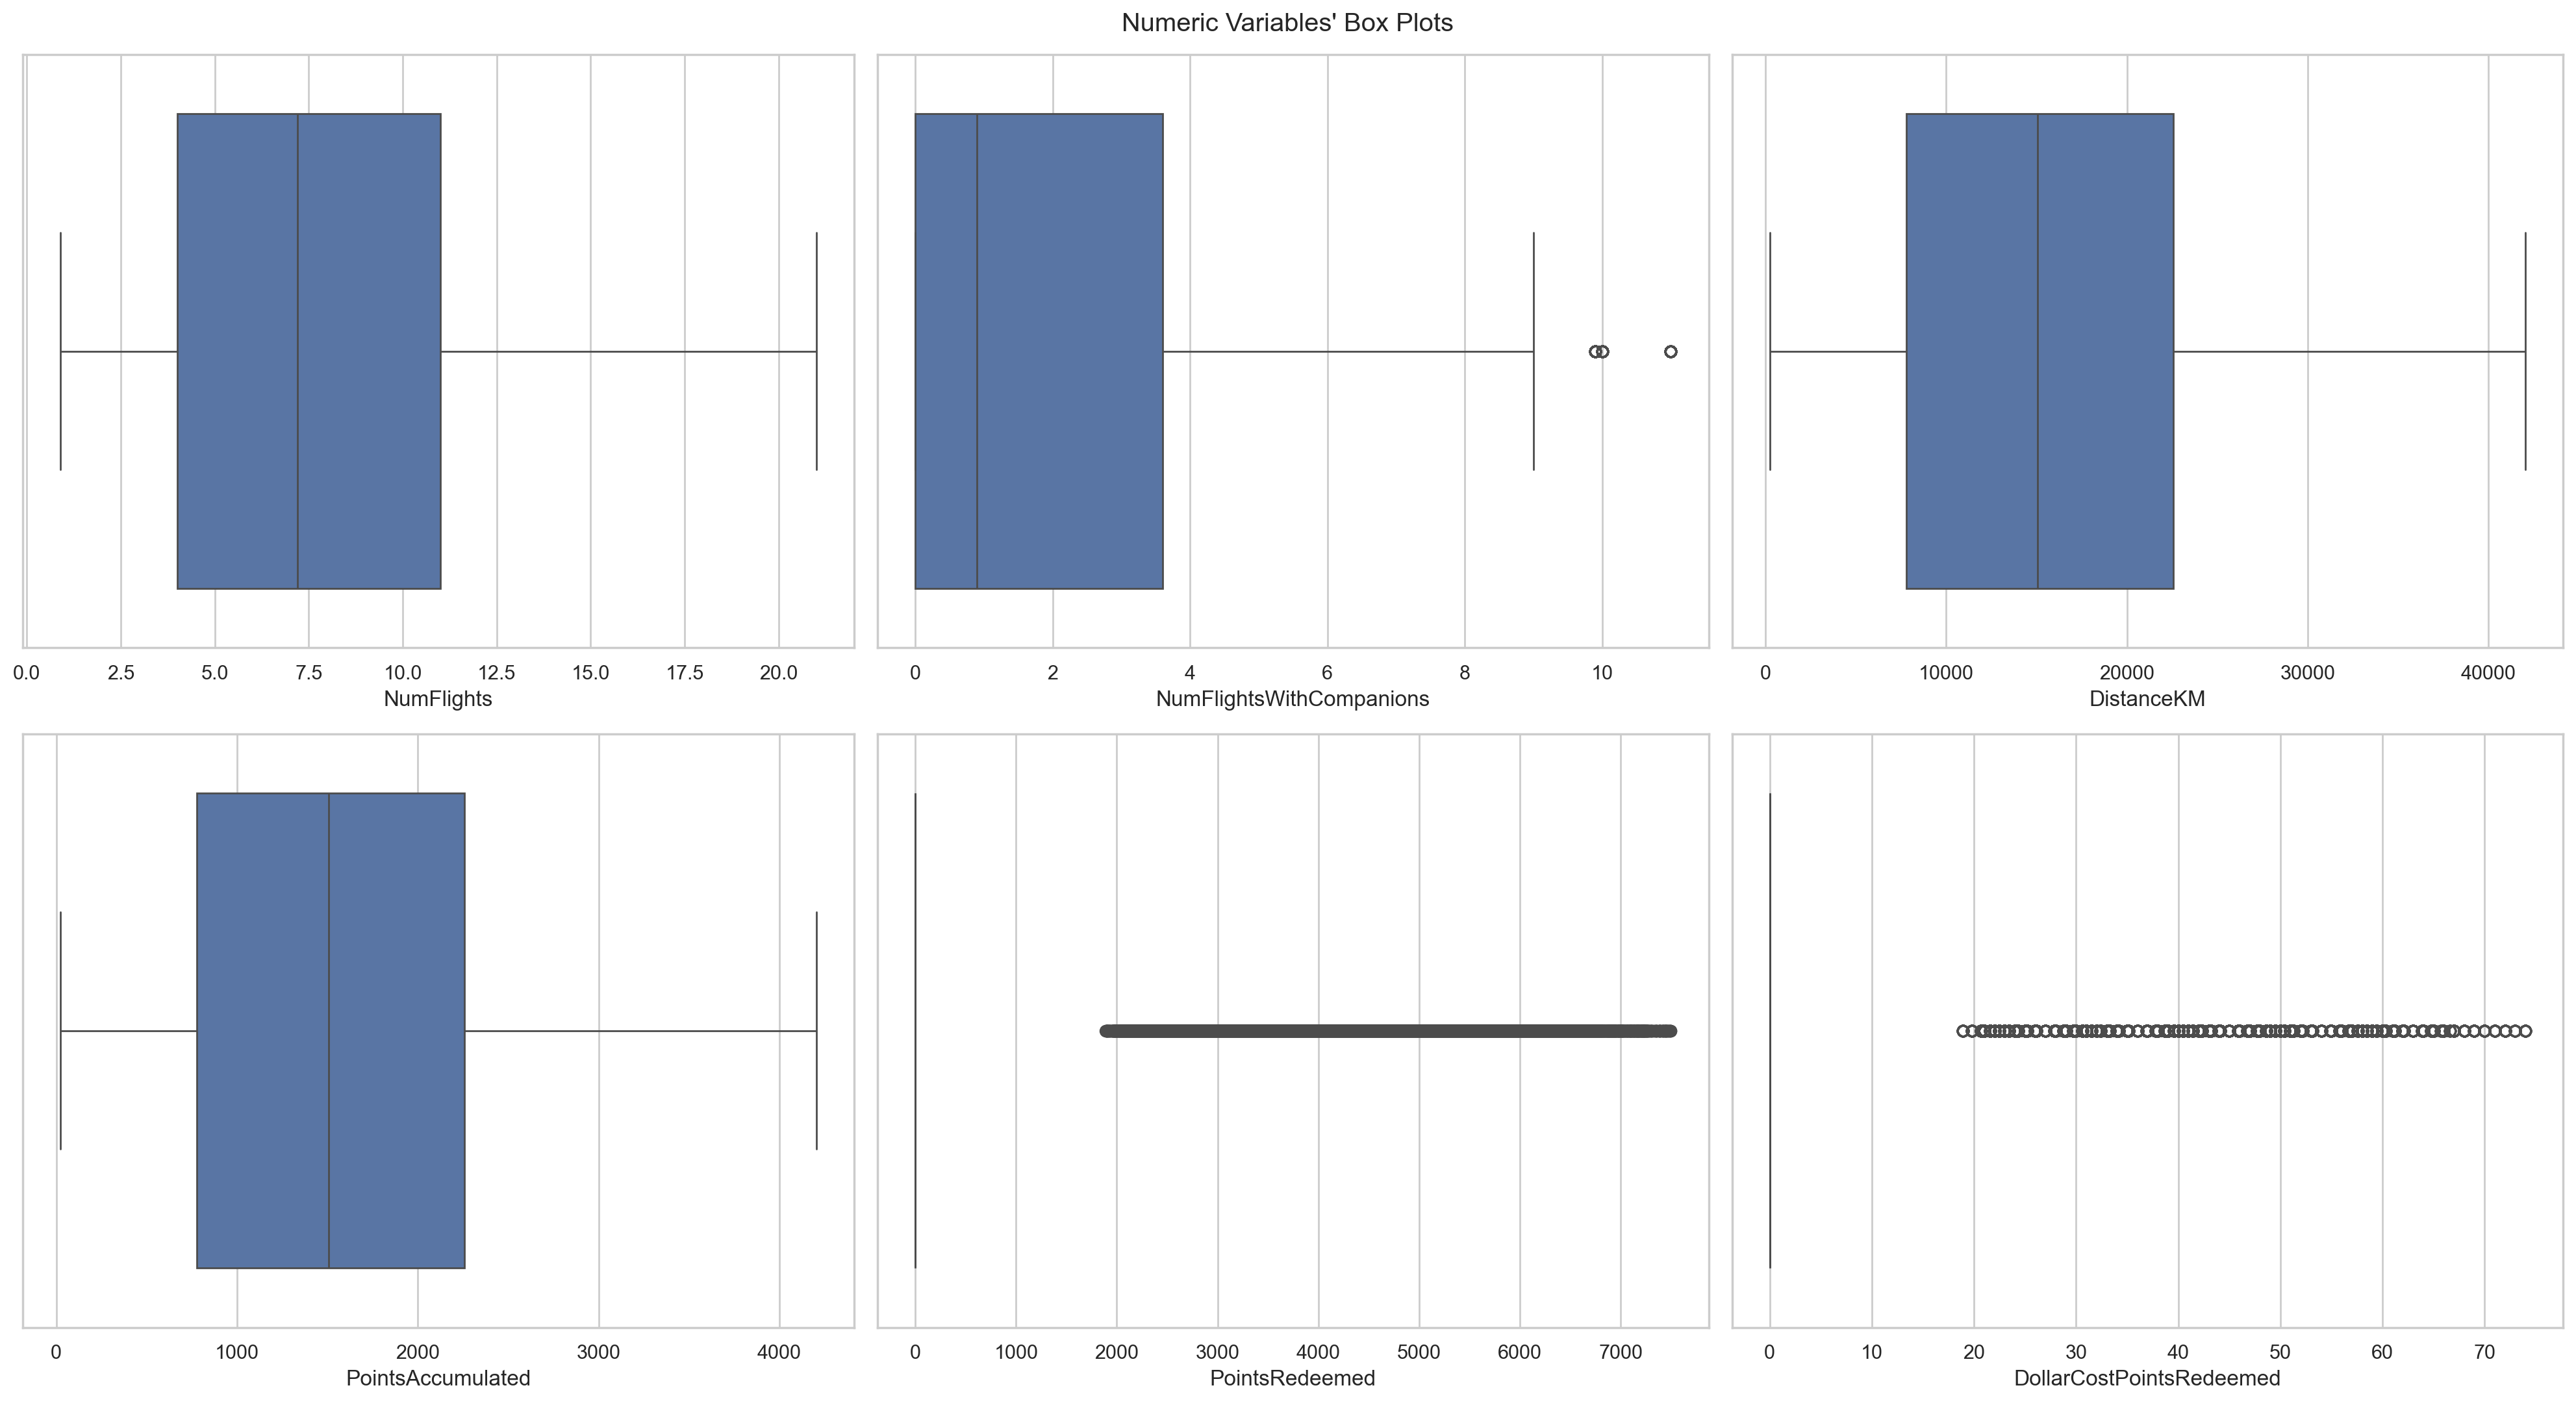

In [ ]:
# Plot ALL Numeric Variables' boxplots in one figure

sns.set() ## Reset to darkgrid

# Setting seaborn style
sns.set_style("whitegrid")

# Setting seaborn context
sns.set_context("notebook")


## What do these do?
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=df_flights_filtered[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
"""
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    # if the eda directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)
"""

plt.show()

Text(0.5, 0.98, 'Pairwise Relationship of Numerical Variables')

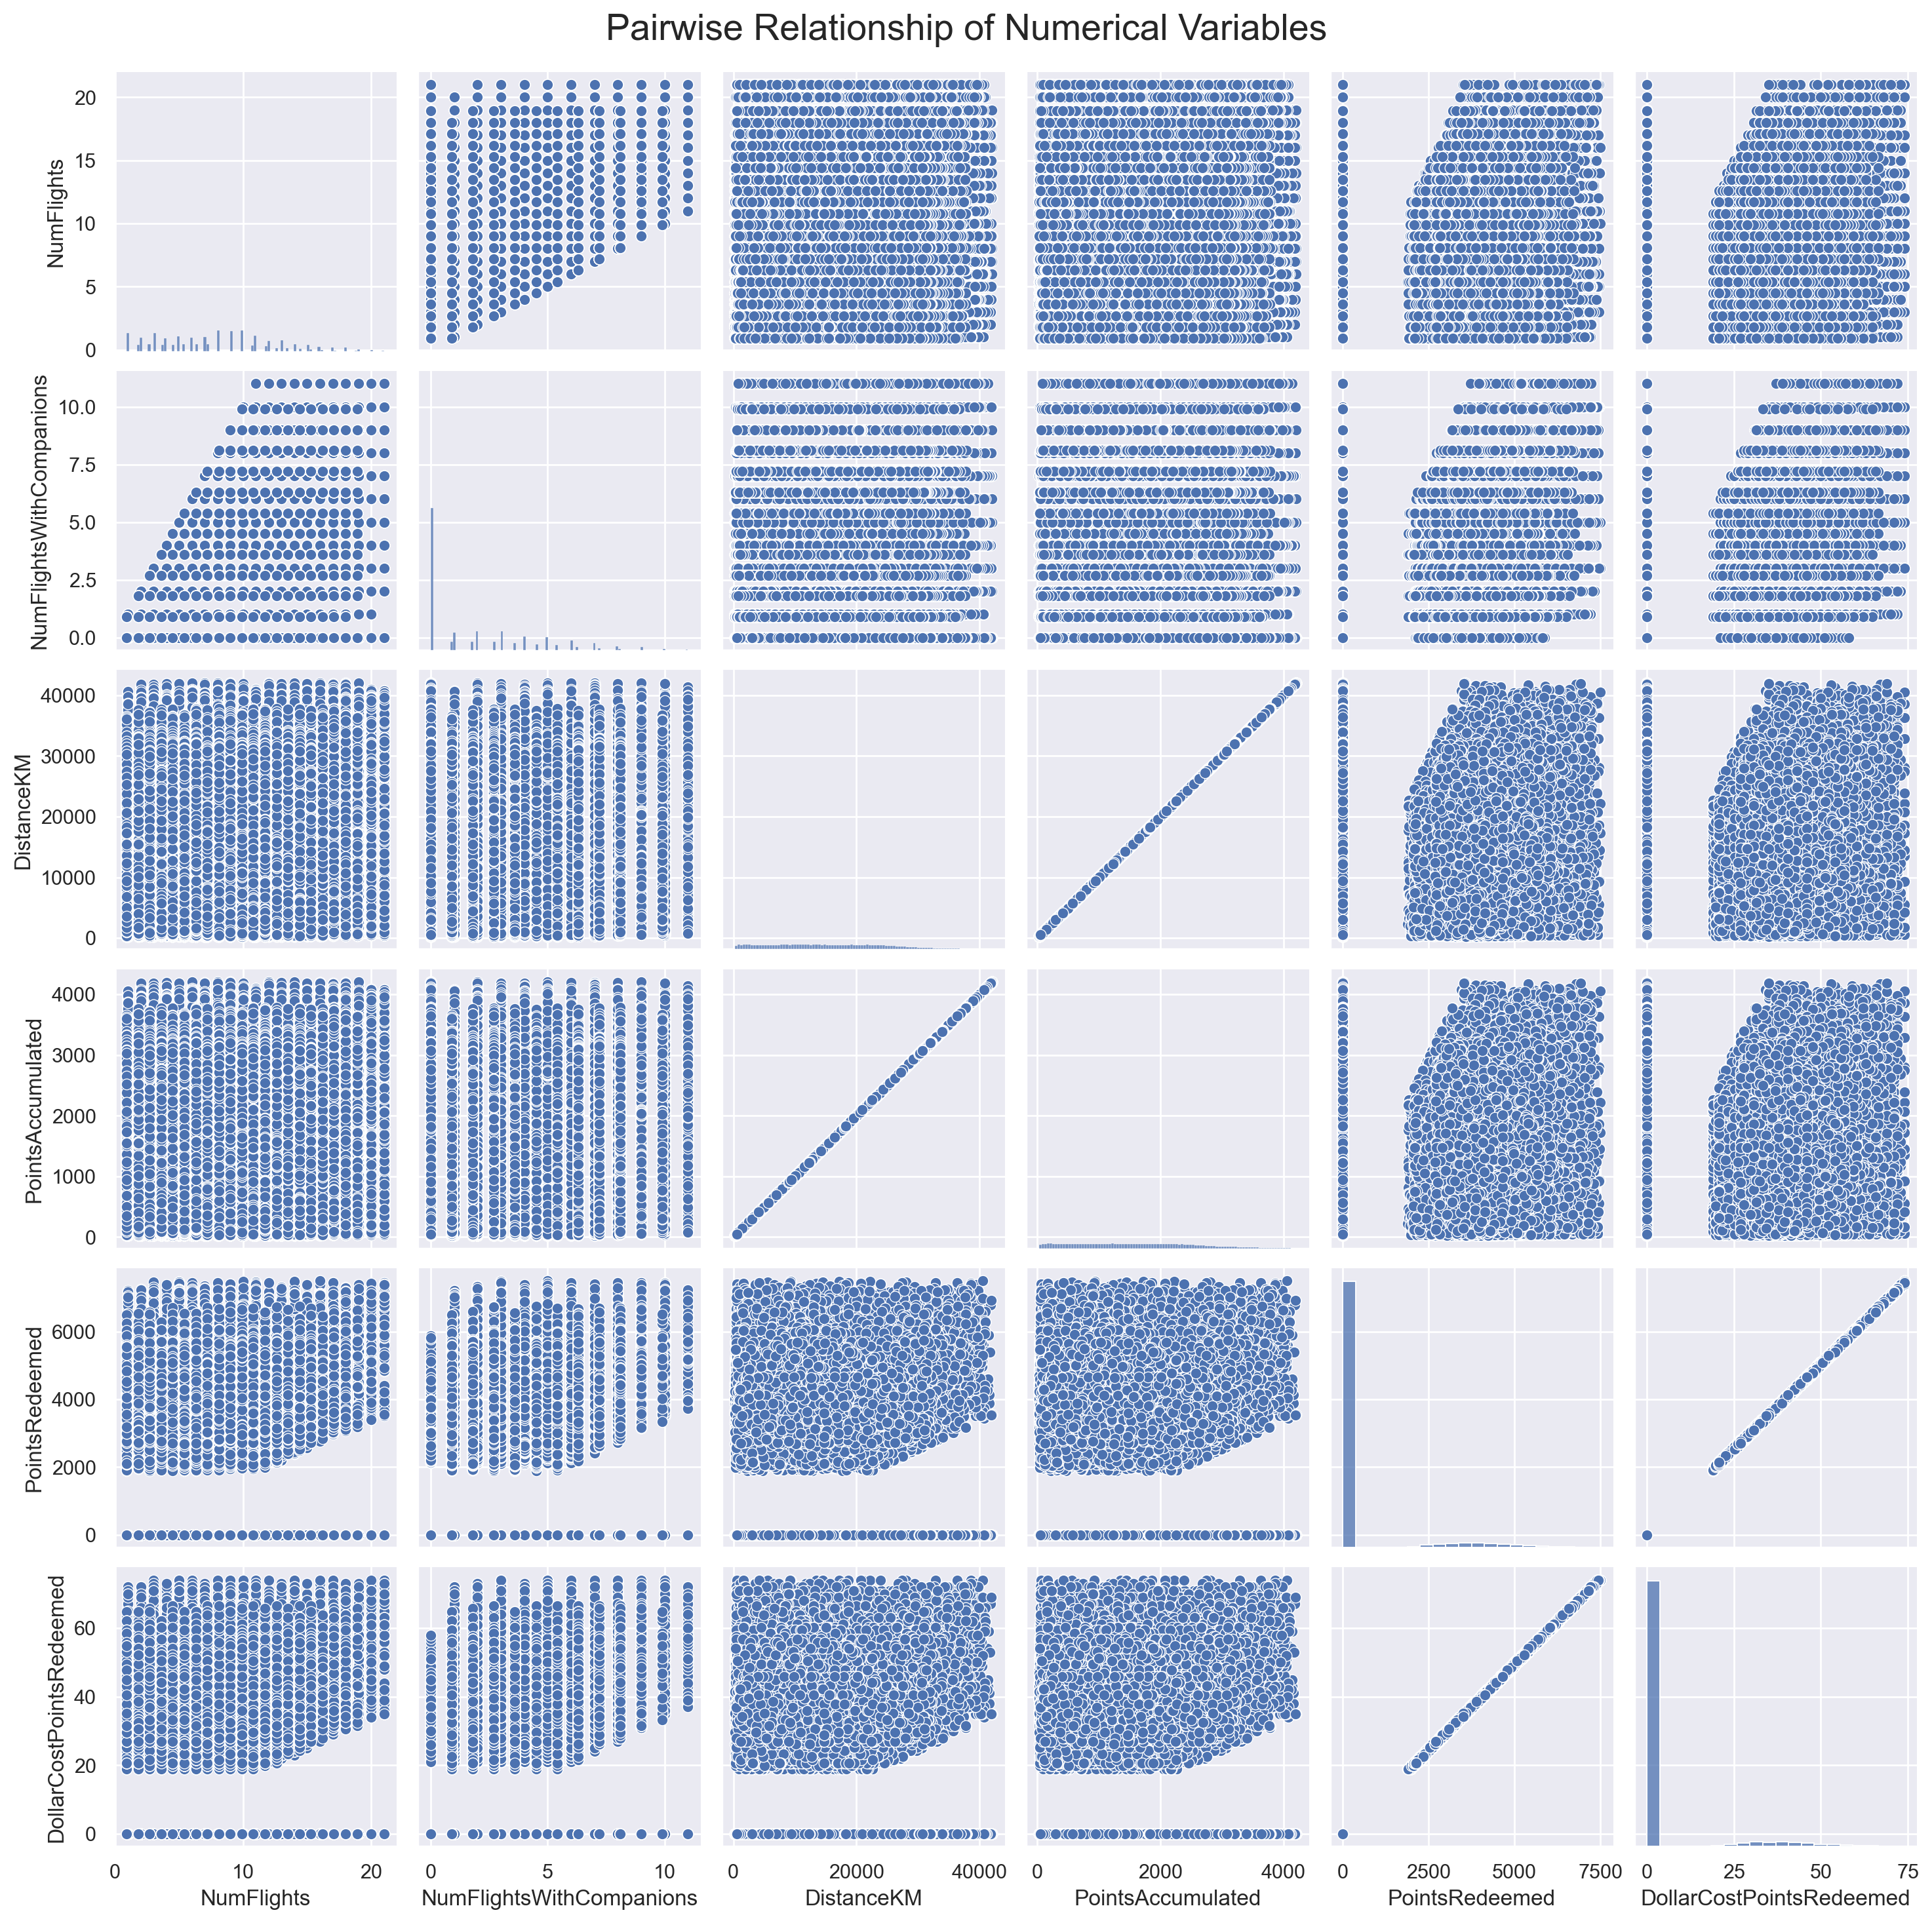

In [20]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df_flights_filtered[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

## Correlation Matrix

ValueError: Unknown format code 'f' for object of type 'numpy.str_'

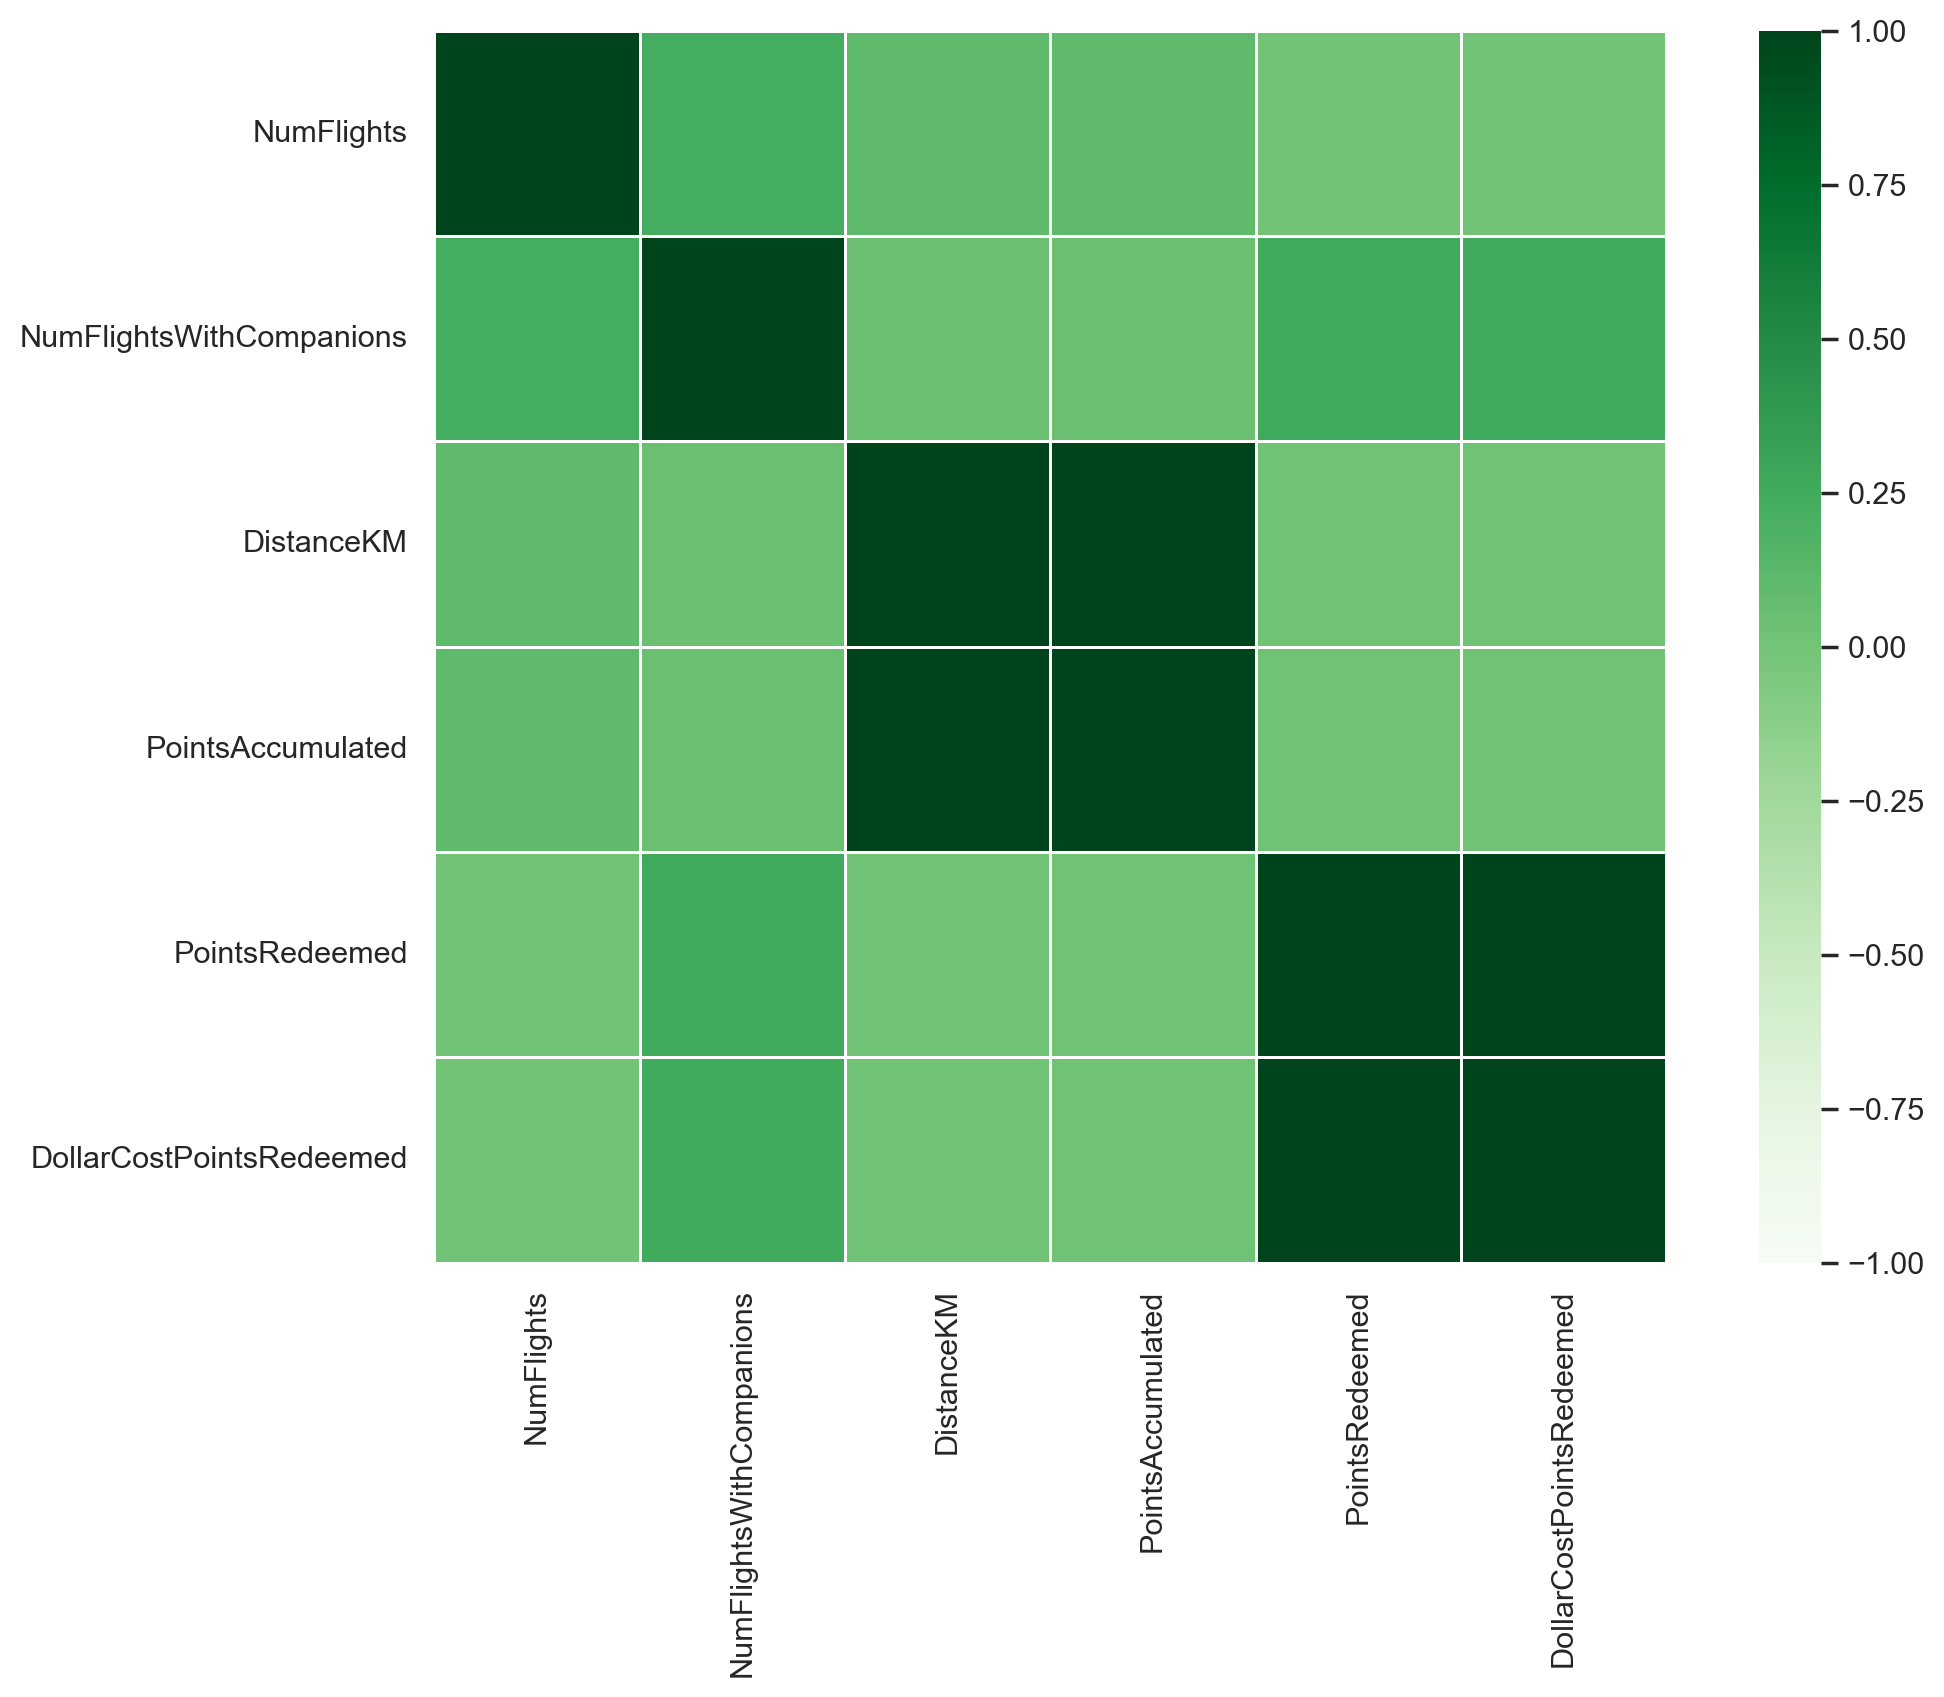

In [ ]:
# Obtain correlation matrix. 
corr = df_flights_filtered[metric_features].corr(method="pearson")

## What does this look like?
mask_annot = np.absolute(corr.values) >= 0.5 


# Try to understand what this np.where() does
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

# Prepare figure
fig = plt.figure(figsize=(12, 8))


# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, 
            annot=annot, # Specify custom annotation
            fmt='.2f', # The annotation matrix now has strings, so we need to explicitly say this
            vmin=-1, vmax=1, center=0,   # 6.3a: escala fixa -1 a +1
            square=True, linewidths=0.5, # 6.3b: células quadradas + bordas
            cmap="Greens"              # 6.3c: bom colormap para correlações
           )

## Once you are happy, save this as an image
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

plt.show()

In [ ]:
df_flights["PointsRedeemRatio"] = df_flights["PointsRedeemed"] / df_flights["PointsAccumulated"]
df_flights["AverageDistancePerFlight"] = df_flights["DistanceKM"] / df_flights["NumFlights"]
df_flights["FlightsWithCompanionsRatio"] = df_flights["NumFlightsWithCompanions"] / df_flights["NumFlights"]

ValueError: Unknown format code 'f' for object of type 'numpy.str_'

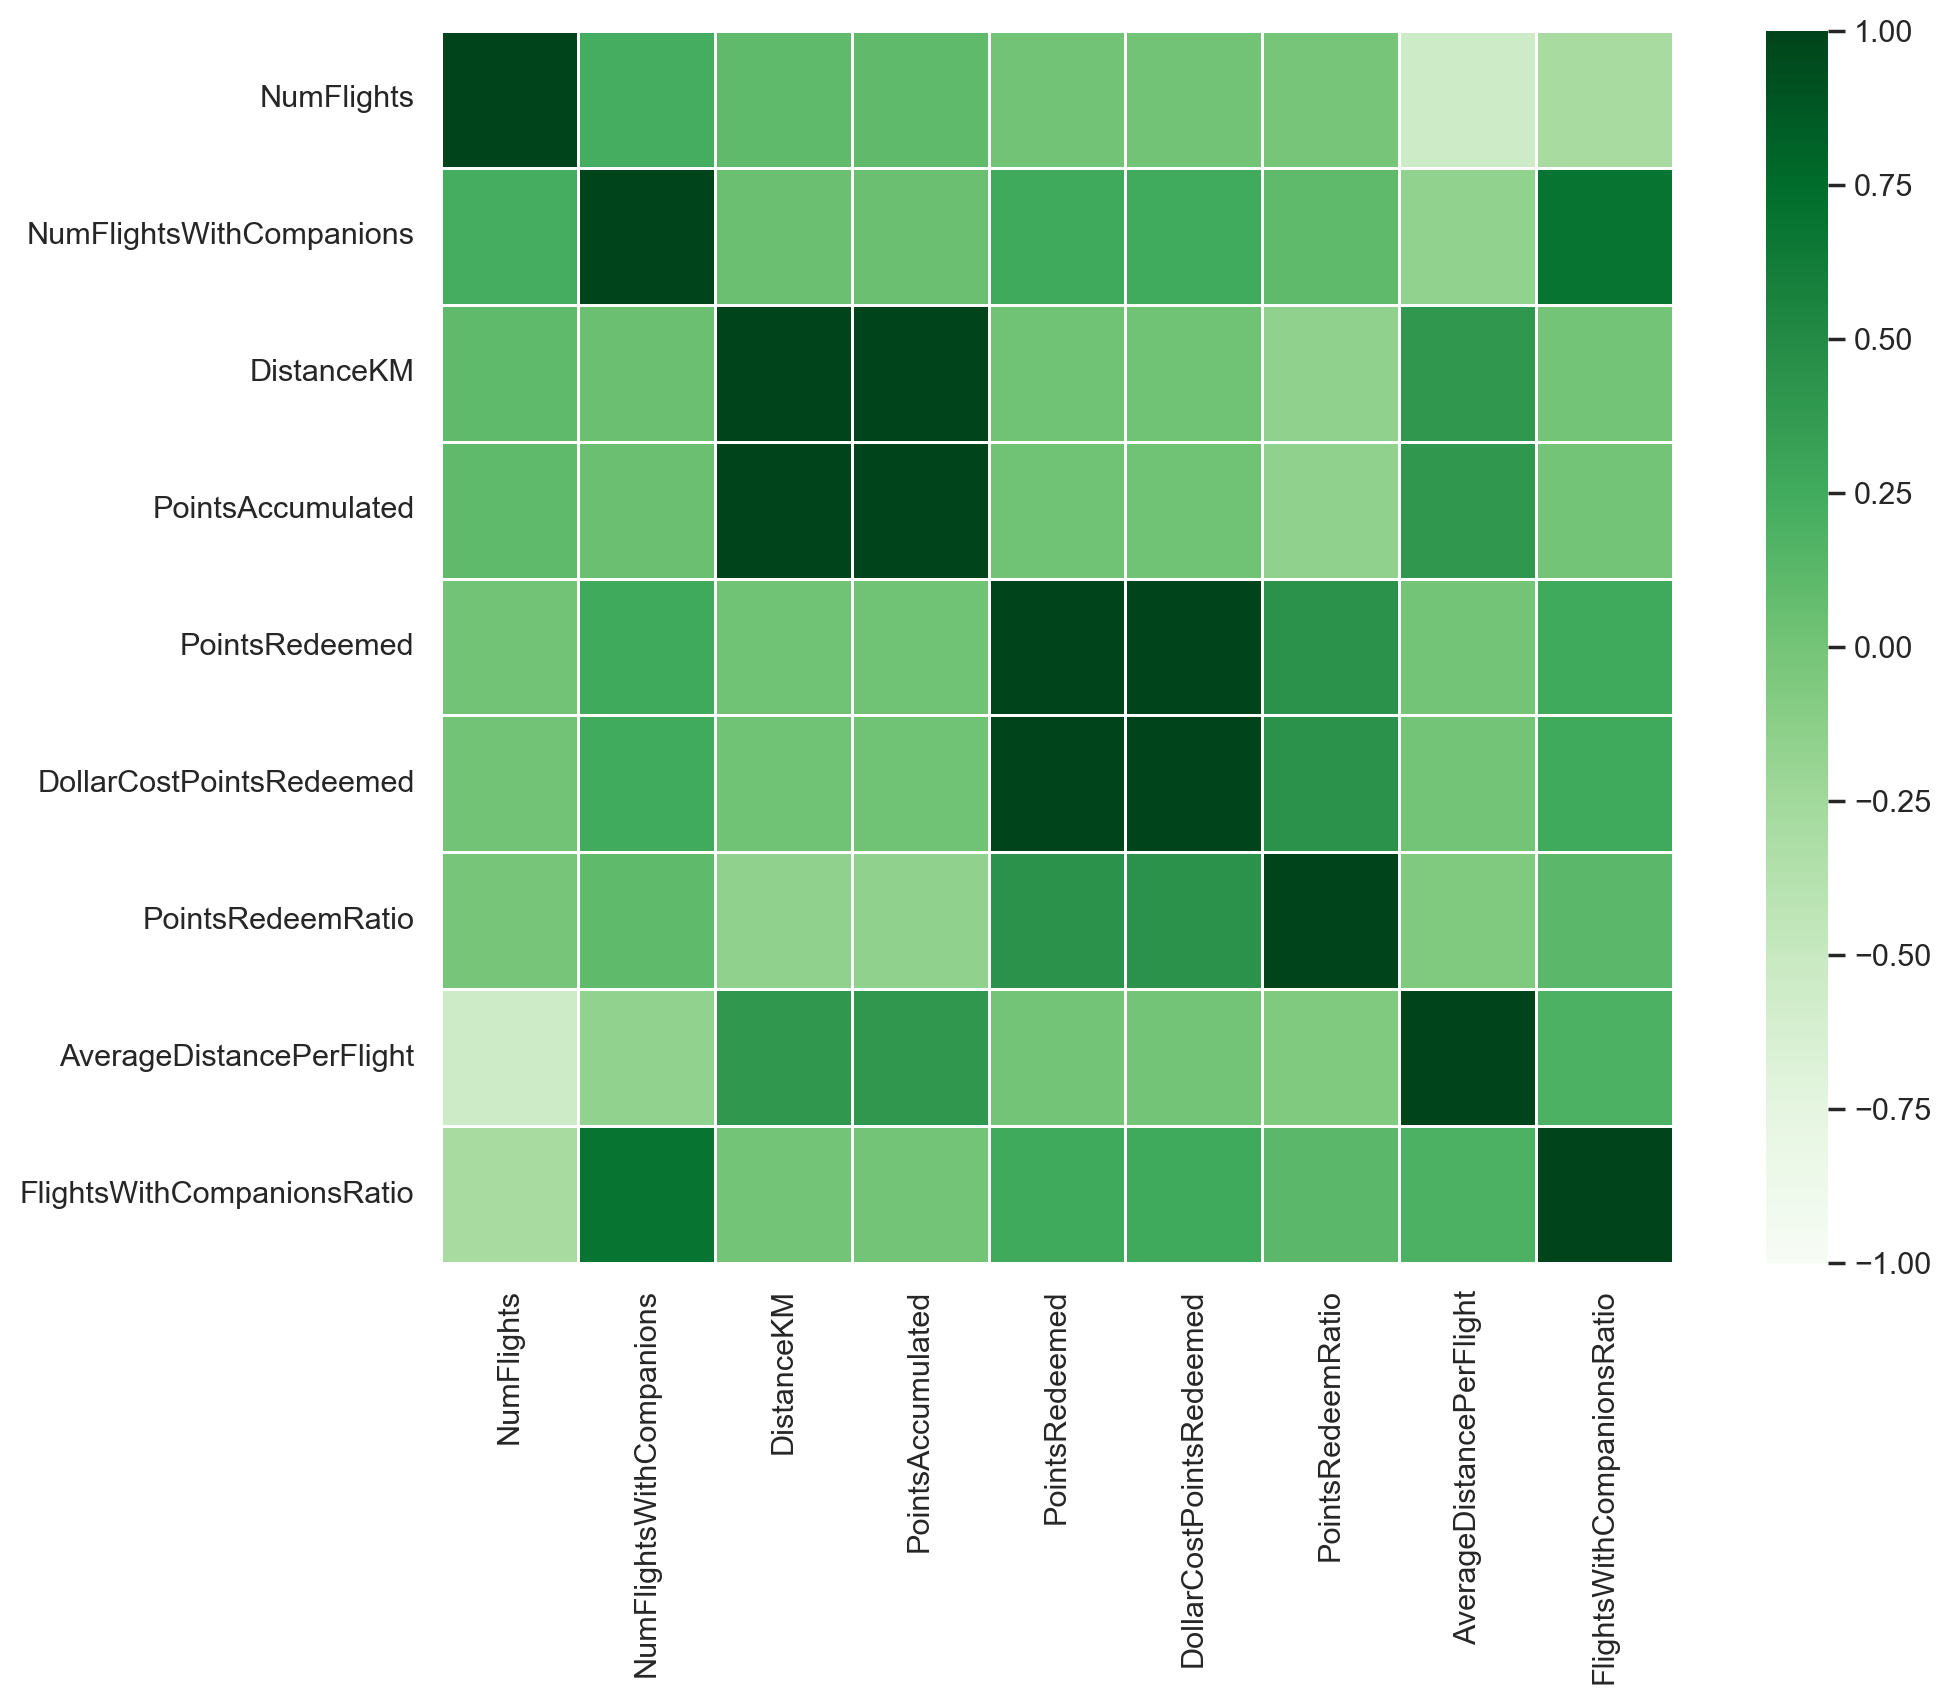

In [27]:
metric_features.append("PointsRedeemRatio")
metric_features.append("AverageDistancePerFlight")
metric_features.append("FlightsWithCompanionsRatio")

# Obtain correlation matrix. 
corr = df_flights_filtered[metric_features].corr(method="pearson")

## What does this look like?
mask_annot = np.absolute(corr.values) >= 0.5 


# Try to understand what this np.where() does
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

# Prepare figure
fig = plt.figure(figsize=(12, 8))


# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, 
            annot=annot, # Specify custom annotation
            fmt='.2f', # The annotation matrix now has strings, so we need to explicitly say this
            vmin=-1, vmax=1, center=0,   # 6.3a: escala fixa -1 a +1
            square=True, linewidths=0.5, # 6.3b: células quadradas + bordas
            cmap="Greens"              # 6.3c: bom colormap para correlações
           )

## Once you are happy, save this as an image
# plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

plt.show()

## How can we improve this figure?

In [1]:
# nao esquecer de ver incoenrencias no codigo, por exemplo numero de flights 0 e km de viagem positivos